Practical No. 03

Aim : To perform and analysis of Naive Bayes, Confusion matrix, K fold cross Validation 

In [1]:
#Name : Santosh G. Kandalkar
#Roll no. : 74 (BDA-B74)
#Section : B
#Subject : PE-II
#Date : 

In [3]:
#Finding the parameters of confusion matrix

In [5]:
import pandas as pd

In [7]:
import os

In [8]:
import numpy as np

In [10]:
os.getcwd()

'C:\\Users\\SANTOSH\\Desktop\\Study Hub\\6th Semester\\PE - II\\Big-Data-Analytics'

In [12]:
os.chdir("C:\\Users\\SANTOSH\\Desktop\\Study Hub\\6th Semester\\PE - II\\Big-Data-Analytics")

In [14]:
data = pd.read_csv("heart.csv")

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [23]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
data.size

14350

In [27]:
data.shape

(1025, 14)

In [29]:
data.ndim

2

Data pre-processing, data-cleaning, mising value treatment

In [33]:
data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [36]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#Removing Duplicates

In [41]:
data_dup =data.duplicated().any()

In [43]:
data_dup

True

In [45]:
data=data.drop_duplicates()

In [47]:
data_dup =data.duplicated().any()

In [49]:
data_dup

False

Splitting dataset into training and testing

In [55]:
x = data.drop('target', axis = 1)
y = data['target']

In [116]:
#splitting the data into training and testing data sets

from sklearn.model_selection import train_test_split, KFold, cross_val_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=42)

In [63]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
163,48,1,0,124,274,0,0,166,0,0.5,1,0,3
291,58,1,0,128,259,0,0,130,1,3.0,1,2,3
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2
239,62,0,0,150,244,0,1,154,1,1.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2
77,63,1,0,140,187,0,0,144,1,4.0,2,2,3
125,60,0,3,150,240,0,1,171,0,0.9,2,0,2
522,67,0,2,152,277,0,1,172,0,0.0,2,1,2


In [65]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,44,1,1,130,219,0,0,188,0,0.0,2,0,2
349,62,0,2,130,263,0,1,97,0,1.2,1,1,3
135,58,0,0,170,225,1,0,146,1,2.8,1,2,1
389,63,1,3,145,233,1,0,150,0,2.3,0,0,1
66,53,1,2,130,197,1,0,152,0,1.2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,70,1,1,156,245,0,0,143,0,0.0,2,0,2
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
274,66,1,0,160,228,0,0,138,0,2.3,2,0,1


In [67]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [69]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [71]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 

In [81]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [83]:
y_pred = nb_classifier.predict(x_test)

In [85]:
accuracy_score (y_test,y_pred)

0.8524590163934426

Confusion Matrix

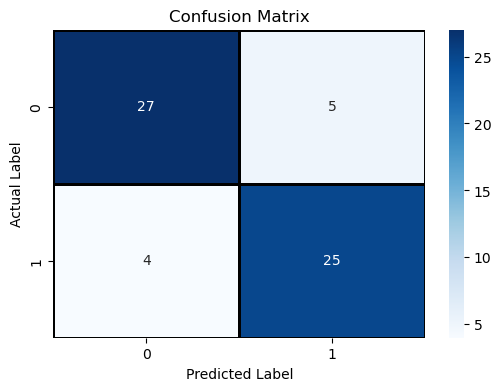

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

labels = np.unique(y_test)  # Get unique class labels
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

In [94]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# Error Rate
error_rate = 1 - accuracy
print(f'Error Rate: {error_rate:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[27  5]
 [ 4 25]]
Accuracy: 0.8525
Precision: 0.8531
Recall: 0.8525
Error Rate: 0.1475
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



K Fold Cross Validation 

In [105]:
from sklearn.model_selection import KFold, cross_val_score

In [109]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform Cross Validation
scores = cross_val_score(nb_classifier, x, y, cv=kf, scoring='accuracy')


In [111]:

# Print results
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.4f}')

Cross-validation scores: [0.85245902 0.81967213 0.83333333 0.76666667 0.83333333]
Mean accuracy: 0.8211
